In [1]:
#importação da base
import pandas as pd
base = pd.read_csv('train.csv')
import numpy as np
##########Graficos#############\
import matplotlib.pyplot as plt

train = base


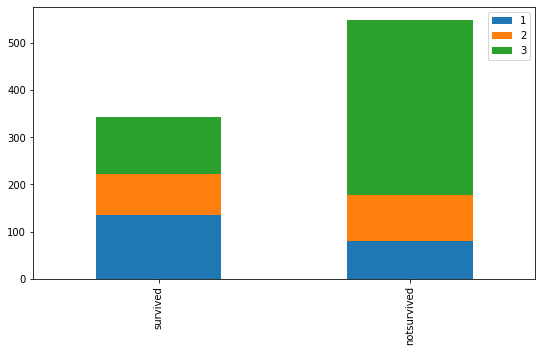

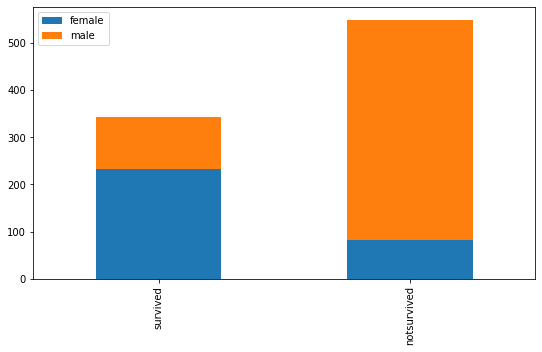

In [2]:
#Barchart
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    notsurvived = train[train['Survived']==0][feature].value_counts()
    df =pd.DataFrame([survived,notsurvived])
    df.index = ['survived','notsurvived']
    df.plot(kind = 'bar', stacked = True, figsize =(9,5))

bar_chart('Pclass')
bar_chart('Sex')


Text(5, 6.5, 'Matriz de correlação')

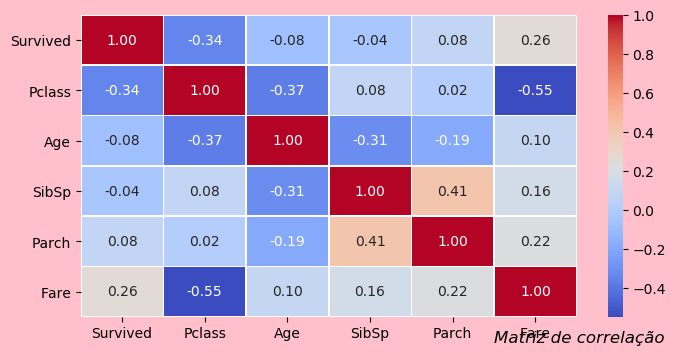

In [3]:

##########Matriz de correlação#############
import seaborn as sns
plt.figure(figsize=(8,4), dpi = 100, facecolor = 'Pink')
matriz_correl = sns.heatmap(train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].corr(), annot = True, fmt='.2f', cmap= 'coolwarm',linewidths=.5)
plt.text(5,6.5, "Matriz de correlação", fontsize = 12, color='Black', fontstyle='italic')


In [4]:
#########################Tratamento dos dados#####################################



#substituindo valores nulos por 'S'

datamissing = [base]
for data in datamissing:
        base['Embarked'] = base['Embarked'].fillna('S')



# Substituindo letras por numeros

def embarked(s):
    if s =='S' :
        return 1
    elif s == 'C':
        return 2
    else:
        return 3

base['Embarked']=base['Embarked'].apply(embarked)
       
     
#SEX

gender = {'male': 0, 'female': 1}
for data in base:
    if data == 'Sex':
        base['Sex'] = base['Sex'].map(gender)

#exclui coluna B_Stance
#base.drop(base['B_Stance'], axis = 0) # não funcionou?????
#del base['Name']
del base['PassengerId']
del base['Ticket']
del base['Cabin']


data = [base]
Title = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False)
#Replace title with more common one
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr', 
                                                'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].map(Title)
    dataset['Title'] = dataset['Title'].fillna(0)
dataset['Title'].unique()
del base['Name']




#excluindo linhas de "Embarked" que possuam valores nulos
#base = base.dropna(subset=['Embarked'])

#localizando registros nulos e alterando pela média
#base.loc[pd.isnull(base['B_avg_BODY_att']),'B_avg_BODY_att'] = base['B_avg_BODY_att'][base.B_avg_BODY_att>0].mean()
colunas = []        
colunas = base.columns 
colunas = np.asarray(colunas)
for i in range(colunas.size):   
        if base[colunas[i]].isnull().sum() > 0:
           # print( colunas[i])
            base.loc[pd.isnull(base[colunas[i]]),colunas[i]] =  base[colunas[i]][base[colunas[i]]>0].mean()



# AGE
            
data = [base]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=11,'Age'] =0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age']<=20),'Age'] = 1
    dataset.loc[(dataset['Age'] >20) & (dataset['Age']<=25),'Age'] = 2
    dataset.loc[(dataset['Age'] >25) & (dataset['Age']<=30),'Age'] = 3
    dataset.loc[(dataset['Age'] >30) & (dataset['Age']<=38),'Age'] = 4
    dataset.loc[(dataset['Age'] >38) & (dataset['Age']<=50),'Age'] = 5
    dataset.loc[(dataset['Age'] >50) & (dataset['Age']<=62),'Age'] = 6
    dataset.loc[dataset['Age']>62,'Age'] = 7

base['Age'] = base['Age'].astype(int)

base['Age'].value_counts()

# FARE
    
from sklearn.preprocessing import LabelEncoder
base['Fare'] = pd.qcut(base['Fare'],4)
lbl = LabelEncoder()
base['Fare'] = lbl.fit_transform(base['Fare'])
base['Fare'] = base['Fare'].astype(int)



data = [base]
for dataset in data:
    dataset['Relative'] = dataset['SibSp']+dataset['Parch']
    
#del base['SibSp']
#del base['Parch']


#criando nova coluna
base['Survived2'] = base['Survived']
del base['Survived']
base.rename(columns={'Survived2':'Survived'}, inplace = True)


In [5]:
previsores = base.iloc[:,0:9].values
classe = base.iloc[:,9].values
#escalonamento- deixar os valores em esclas parecidas -> melhor desempenho
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

#treinamento e teste
from sklearn.model_selection import train_test_split
previsores_treinamento,previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.25, random_state=0)



In [7]:
#importação da biblioteca (SVM)
from sklearn.svm import SVC
classificador = SVC(kernel = 'rbf', random_state= 1, C = 1)
classificador.fit(previsores_treinamento,classe_treinamento)
previsao_SVC = classificador.predict(previsores_teste)


#Resultado (SVM)
from sklearn.metrics import accuracy_score,confusion_matrix
precisao_SVC = accuracy_score(previsao_SVC,classe_teste)
matriz_SVC = confusion_matrix(previsao_SVC,classe_teste)
print('precisao_SVC',precisao_SVC)
print('matriz_SVC\n',matriz_SVC)


precisao_SVC 0.8071748878923767
matriz_SVC
 [[120  24]
 [ 19  60]]


In [8]:

#### OBS: sem Dummy:0.7238805970149254

#Resultado (REGRESSÂO LOGISTICA)
from sklearn.linear_model import LogisticRegression
classificador = LogisticRegression(random_state=1)
classificador.fit(previsores_treinamento,classe_treinamento)
previsoes_REGLOG = classificador.predict(previsores_teste)

#resultado (REGRESSÂO LOGISTICA)
from sklearn.metrics import accuracy_score, confusion_matrix
precisao_REGLOG = accuracy_score(previsoes_REGLOG, classe_teste)
matriz_REGLOG = confusion_matrix(previsoes_REGLOG,classe_teste)

print('precisao_REGLOG',precisao_REGLOG)
print('matriz_REGLOG\n',matriz_REGLOG)

precisao_REGLOG 0.7847533632286996
matriz_REGLOG
 [[111  20]
 [ 28  64]]


In [9]:
#aplicação do algorítmo (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
classificador.fit(previsores_treinamento,classe_treinamento)
previsao_RF =  classificador.predict(previsores_teste)

#Resultado  (RANDOM FOREST)
from sklearn.metrics import confusion_matrix, accuracy_score
precisao_RF = accuracy_score(classe_teste,previsao_RF)
matriz_RF = confusion_matrix(classe_teste,previsao_RF)

print('precisao_RF',precisao_RF)
print('matriz_RF\n',matriz_RF)

precisao_RF 0.8116591928251121
matriz_RF
 [[120  19]
 [ 23  61]]


In [10]:
#importação para (NAIVE BAYES)
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores_treinamento,classe_treinamento)
previsoes_BAYES = classificador.predict(previsores_teste)

# comparação de resultado (NAIVE BAYES)
from sklearn.metrics import confusion_matrix, accuracy_score
precisao_BAYES = accuracy_score(classe_teste,previsoes_BAYES)
matriz_BAYES = confusion_matrix(classe_teste,previsoes_BAYES)

print('precisao_BAYES',precisao_BAYES)
print('matriz_BAYES\n',matriz_BAYES)

precisao_BAYES 0.7757847533632287
matriz_BAYES
 [[106  33]
 [ 17  67]]


In [11]:
# importação da bibliotca(KNN)
from sklearn.neighbors import KNeighborsClassifier
classificador = KNeighborsClassifier(n_neighbors=5,metric='minkowski',  p=2)
classificador.fit(previsores_treinamento,classe_treinamento)
previsoes_KNN = classificador.predict(previsores_treinamento)

#Resulado(KNN)
from sklearn.metrics import confusion_matrix, accuracy_score
precisao_KNN = accuracy_score(classe_treinamento,previsoes_KNN)
matriz_KNN = confusion_matrix(classe_treinamento,previsoes_KNN)

print('precisao_KNN',precisao_KNN)
print('matriz_KNN\n',matriz_KNN)

precisao_KNN 0.8517964071856288
matriz_KNN
 [[371  39]
 [ 60 198]]


In [12]:
# Arvore de decisão -> 
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classificador.fit(previsores_treinamento,classe_treinamento)
previsoes_TREE = classificador.predict(previsores_teste)

from sklearn.metrics import confusion_matrix, accuracy_score
precisao_TREE = accuracy_score(classe_teste,previsoes_TREE)
matriz_TREE = confusion_matrix(classe_teste, previsoes_TREE)


print('precisao_TREE',precisao_TREE)
print('matriz_TREE\n',matriz_TREE)

precisao_TREE 0.8116591928251121
matriz_TREE
 [[122  17]
 [ 25  59]]


In [14]:
#Resultado (REDES NEURAIS KERAS)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classificador = Sequential()
classificador.add(Dense(units = 5, activation = 'relu', input_dim = 9)) #imput_dim -> neurônios na camada de entrada
classificador.add(Dense(units = 5, activation = 'relu', ))
classificador.add(Dense(units = 1, activation = 'sigmoid'))
classificador.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, nb_epoch = 10)
previsao_KERAS = classificador.predict(previsores_teste)
previsao_KERAS = previsao_KERAS > 0.5

from sklearn.metrics import accuracy_score, confusion_matrix
precisao_KERAS = accuracy_score(previsao_KERAS, classe_teste)
matriz_KERAS= confusion_matrix(previsao_KERAS,classe_teste)


print('precisao_KERAS',precisao_KERAS)
print('matriz_KERAS\n',matriz_KERAS)

ModuleNotFoundError: No module named 'tensorflow'